In [234]:
import numpy as np
import PSO.PSO as pso
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

In [235]:
pso = pso.pso(50, 2)

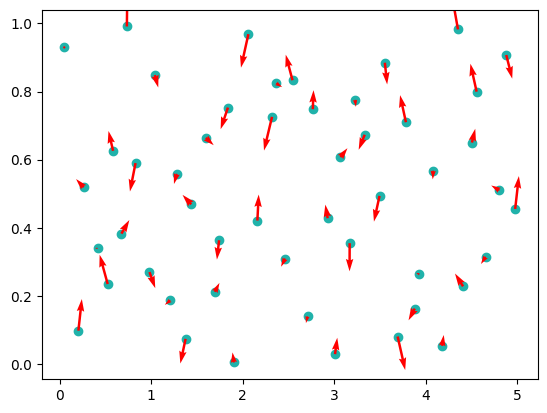

In [236]:
pso.bounds = np.array([[0,5], [0, 1]])

pso.initial_velocity = 0.1
pso.InitialiseSwarmLocations()
pso.InitialiseSwarmVelocities()

plt.figure()
plt.scatter(pso.swarm_locations[:, 0], pso.swarm_locations[:, 1], color='lightseagreen')
plt.quiver(pso.swarm_locations[:, 0], pso.swarm_locations[:, 1], pso.swarm_velocities[:, 0], pso.swarm_velocities[:, 1], color='red', width=0.005, angles='xy', scale_units='xy', scale=1)
plt.show()

In [237]:
def BoxSizeFunction(iteration):
    cutoff = 5
    box_size = 0.1
    if (iteration < cutoff):
        return box_size*(1 - np.tanh(0.1*iteration))
    else: 
        return 0.0001

pso.use_adaptive_boxes = True
pso.BoxSizeFunction = BoxSizeFunction
pso.CreateBoxes() 

In [238]:
def SampleSizeFunction(iteration):
    if iteration < 5:
        return int(10 - 2*iteration)
    else:
        return 1

pso.SampleSizeFunction = SampleSizeFunction

pso.PopulateBoxes()

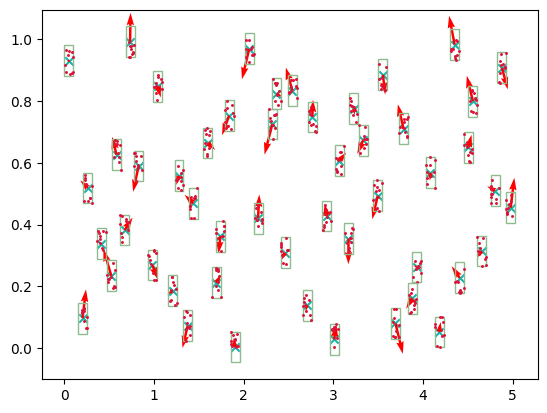

In [239]:
plt.figure()
side_length = pso.BoxSizeFunction(pso.current_iteration)
plt.scatter(pso.swarm_locations[:, 0], pso.swarm_locations[:, 1], color='lightseagreen', marker='x')
plt.quiver(pso.swarm_locations[:, 0], pso.swarm_locations[:, 1], pso.swarm_velocities[:, 0], pso.swarm_velocities[:, 1], color='red', width=0.005, angles='xy', scale_units='xy', scale=1)
for p in range(pso.number_of_particles):
    plt.gca().add_patch(patches.Rectangle((pso.swarm_locations[p, 0] - side_length / 2, pso.swarm_locations[p, 1] - side_length / 2),side_length, side_length, fill=False, edgecolor='darkseagreen'))
    for s in range(pso.SampleSizeFunction(pso.current_iteration)):
        plt.scatter(pso.sample_points[p][s][0], pso.sample_points[p][s][1], marker='.', color='crimson', s=5)

In [240]:
def GenerateY (X):
    
    def Gaussian(x):
        total=1
        for i in range(len(x)):
            total = total * (np.exp(-((x[i]-.3)**2)) + 0.8*np.exp(-1000*((x[i]-.9)**2)))
        return total
    
    y_values = []
    for p in range(len(X)):
        sample_values = []
        for s in range(len(X[p])):
            sample_values.append(Gaussian(X[p][s]))
        y_values.append(sample_values)
    return(y_values)
        
#GenerateY([[[.7, .7, .7], [.3, .3, .3]], [[.4, .4, .4]]])

pso.GenerateY = GenerateY

In [241]:
pso.Get_Y_Values()
pso.UpdateGlobalMax()
print(f'Global Maximum: {pso.global_maximum}')
print(f'Location of Global Maximum: {pso.global_maximum_loc}') 

Global Maximum: 1.4223009544326688
Location of Global Maximum: [0.09194875 0.89547035]


In [242]:
pso.UpdateLocalMaxima()
print(pso.local_maxima)

Size of Local_Maxima_Locs: 50 : 2
[np.float64(2.289743615055976e-09), np.float64(0.29334815959342675), np.float64(1.4223009544326688), np.float64(1.1675227608178118e-05), np.float64(0.006907196650267463), np.float64(0.4486881726612772), np.float64(0.0159567006500018), np.float64(2.5004985592485313e-06), np.float64(6.707458405601153e-08), np.float64(0.0824974606715619), np.float64(0.8911541212161047), np.float64(0.001248055115926943), np.float64(0.00011237043675081155), np.float64(0.9932538464201752), np.float64(0.08970004962159442), np.float64(6.879706377031623e-08), np.float64(1.344880573701014e-08), np.float64(0.16082133277158958), np.float64(0.8448389361973515), np.float64(0.00032916073347560854), np.float64(0.00054489563835414), np.float64(0.8939632754087338), np.float64(0.04916914508719976), np.float64(3.99486507708312e-07), np.float64(6.344401684046066e-06), np.float64(0.011375000843266704), np.float64(0.7816729863816276), np.float64(0.0036218250348498972), np.float64(4.125651763

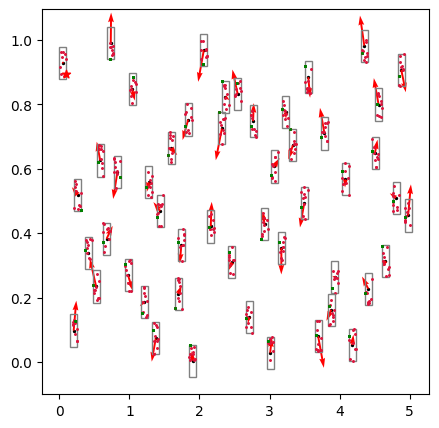

In [243]:
plt.figure(figsize=(5,5))
side_length = pso.BoxSizeFunction(pso.current_iteration)
plt.scatter(pso.swarm_locations[:, 0], pso.swarm_locations[:, 1], color='black', marker='.', s=8)
plt.quiver(pso.swarm_locations[:, 0], pso.swarm_locations[:, 1], pso.swarm_velocities[:, 0], pso.swarm_velocities[:, 1], color='red', width=0.005, angles='xy', scale_units='xy', scale=1)
for p in range(pso.number_of_particles):
    plt.gca().add_patch(patches.Rectangle((pso.swarm_locations[p, 0] - side_length / 2, pso.swarm_locations[p, 1] - side_length / 2),side_length, side_length, fill=False, edgecolor='grey'))
    for s in range(pso.SampleSizeFunction(pso.current_iteration)):
        plt.scatter(pso.sample_points[p][s][0], pso.sample_points[p][s][1], marker='.', color='crimson', s=5)
        plt.scatter(pso.local_maxima_locs[p][0], pso.local_maxima_locs[p][1], marker='.', color='green', s=5)
plt.scatter(pso.global_maximum_loc[0], pso.global_maximum_loc[1], color='red', marker='*')

In [244]:
def LocalWeightFunction (iteration):
    return 0.5*(1 - np.tanh(0.04*iteration))

def GlobalWeightFunction (iteration):
    return 0.8*(np.tanh(0.04*iteration))

# def InertialWeightFunction (iteration):
#     if iteration < 5:
#         return 0.8
#     elif iteration < 100:
#         return 0.7
#     elif iteration < 120:
#         return 0.6
#     elif iteration < 150:
#         return 0.5
#     else:
#         return 0.4

def InertialWeightFunction (iteration):
    return 0.8

In [245]:
pso.use_adaptive_hyper_parameters = True
pso.LocalWeightFunction = LocalWeightFunction
pso.GlobalWeightFunction = GlobalWeightFunction
pso.InertialWeightFunction = InertialWeightFunction
pso.UpdateVelocity()


0.3420563413314688
50
8
0.14272034553566865
Size of Local_Maxima_Locs: 50 : 2
1.4223009544326688
0.43993824054297476
50
6
0.15126670660189637
Size of Local_Maxima_Locs: 50 : 2
1.4223009544326688
0.5758968013576015
50
4
0.18581677967387347
Size of Local_Maxima_Locs: 50 : 2
1.4223009544326688
0.7180822412764382
50
2
0.2810834887797707
Size of Local_Maxima_Locs: 50 : 2
1.4223009544326688
0.8088262357502076
50
1
0.45952353772704463
Size of Local_Maxima_Locs: 50 : 2
1.4223009544326688
0.7573703004935182
50
1
0.7392932378807558
Size of Local_Maxima_Locs: 50 : 2
1.440439542073118
1.194851455315717
50
1
0.8705828351849809
Size of Local_Maxima_Locs: 50 : 2
1.4781111544486574
0.9819002265895632
50
1
0.8705828351849809
Size of Local_Maxima_Locs: 50 : 2
1.4781111544486574
0.7514225945315292
50
1
1.1273521843312877
Size of Local_Maxima_Locs: 50 : 2
1.492881613321219
1.1428213367209075
50
1
1.1273521843312877
Size of Local_Maxima_Locs: 50 : 2
1.492881613321219
1.312399999371323
50
1
1.12735218433128

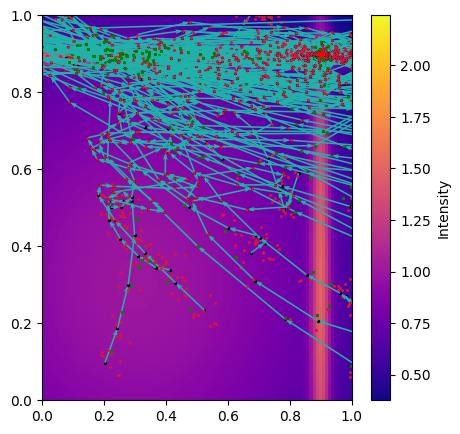

In [246]:
plt.figure(figsize=(5,5))
plt.xlim(0,1)
plt.ylim(0,1)

x = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x, x)
X = np.dstack([X1, X2])

# Generate Y values
Y = GenerateY(X)

# Convert Y to a numpy array for plotting
Y = np.array(Y)

plt.imshow(Y, extent=(0, 1, 0, 1), origin='lower', cmap='plasma', aspect='auto', zorder=0)
plt.colorbar(label='Intensity')

for i in range(50):
    side_length = pso.BoxSizeFunction(pso.current_iteration)
    plt.scatter(np.array(pso.swarm_locations)[:, 0], np.array(pso.swarm_locations)[:, 1], color='black', marker='.', s=8)
    plt.quiver(np.array(pso.swarm_locations)[:, 0], np.array(pso.swarm_locations)[:, 1], np.array(pso.swarm_velocities)[:, 0], np.array(pso.swarm_velocities)[:, 1], color='lightseagreen', width=0.005, angles='xy', scale_units='xy', scale=1)
    for p in range(pso.number_of_particles):
        #plt.gca().add_patch(patches.Rectangle((np.array(pso.swarm_locations)[p, 0] - side_length / 2, np.array(pso.swarm_locations)[p, 1] - side_length / 2),side_length, side_length, fill=False, edgecolor='lightseagreen'))
        for s in range(pso.SampleSizeFunction(pso.current_iteration)):
            plt.scatter(pso.sample_points[p][s][0], pso.sample_points[p][s][1], marker='.', color='crimson', s=5)
            plt.scatter(pso.local_maxima_locs[p][0], pso.local_maxima_locs[p][1], marker='.', color='green', s=5)
    plt.scatter(pso.global_maximum_loc[0], pso.global_maximum_loc[1], color='red', marker='*')
    pso.UpdateIteration()
    pso.UpdateSwarmLocations()
    pso.CreateBoxes()
    pso.PopulateBoxes()
    pso.Get_Y_Values()
    print(np.max(pso.sample_points_Y[1]))
    pso.UpdateGlobalMax()
    print(pso.number_of_particles)
    print(len(pso.sample_points_Y[1]))
    print(pso.local_maxima[p])
    pso.UpdateLocalMaxima()
    pso.UpdateVelocity()
    print(pso.global_maximum)
plt.show()

In [247]:
print(pso.local_maxima)

[np.float64(2.2411012954472795), np.float64(2.2405007384569027), np.float64(2.2405263392758075), np.float64(2.2434128192830607), np.float64(2.2425305194227403), np.float64(2.170199965868752), np.float64(2.243203405809269), np.float64(2.2433019476371086), np.float64(2.241988763951271), np.float64(2.2434514479608367), np.float64(2.2342151977336178), np.float64(2.24355427646793), np.float64(2.2434926935411426), np.float64(2.240735892809922), np.float64(2.24160210465056), np.float64(2.2434408140136983), np.float64(2.2432018689825033), np.float64(2.2433906329388447), np.float64(2.2271505157829505), np.float64(2.2435660652637144), np.float64(2.243566138249819), np.float64(2.229385099831641), np.float64(2.242782954563514), np.float64(2.2435492328875517), np.float64(2.2425788631461034), np.float64(2.2430619178776228), np.float64(2.2430637580987423), np.float64(2.2421844613025854), np.float64(2.2383462148938995), np.float64(2.230733730877748), np.float64(2.242465550261985), np.float64(2.2434295

In [248]:
import pickle

with open('/work4/clf/Josh/Bayesian/PSO/my_object.pkl', 'wb') as file:
    pickle.dump(pso, file)

In [250]:
# Load the object from the file
with open('/work4/clf/Josh/Bayesian/PSO/my_object.pkl', 'rb') as file:
    loaded_object = pickle.load(file)

# Use the loaded object